# Customer churn in telecomunication Companies
Customer Churn occurs when subscribers or customers stop doing business with a company or service. A business typically treats a customer as churned once a specific amount of time has passed since the customers last interaction with the business or service.

Customer churn is a major problem and one of the most important concerns for large companies. Due to the direct effect on the revenues of the companies, especially in the telecom field, companies are seeking to develop means to predict potential customer to churn. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn. The main contribution of our work is to develop a churn prediction model which assists telecom operators to predict customers who are most likely subject to churn

In [1]:
#now that we knw what we are looking at lets go ahead and start
#importing our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
'''thats enough to import, manipulate and visualise our data and also view the data'''

'thats enough to import, manipulate and visualise our data and also view the data'

In [2]:
#lets import our data shall we
data = pd.read_csv("Telco-Customer-Churn.csv")
#view a sample of  our data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#lets check at the amount of the data we are deling with
data.shape

(7043, 21)

In [5]:
#still exploring our data 
#lets view at the set of columns we have and the ones we are gonna work with
data.columns.values


array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
#look whether we have null values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

lucky for us the data is okay and has no null values

In [9]:
#overview o the data
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


I know you might be asking yourself what is Tenure, Tenure is actuall the amount of time that the customer has suscribed for and what we can observe from above  the longest subscription is 72 months that totals to 72/12 which is equal to 6 years
also what we can withdraw from the above overview or summary of our data is that max mothly fee is 118.75 and the minimum is 18.25

In [12]:
#get the number of customer that chuned and didnt
data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

so actually a total of 1869 while those who didnt who are the majority is 5174

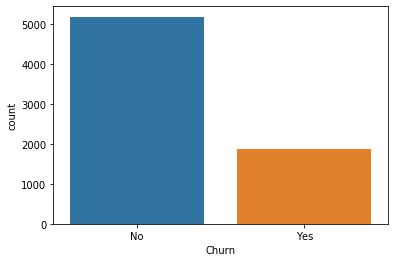

In [13]:
#we could visualise this 
import seaborn as sns
sns.countplot(data["Churn"])

In [18]:
#we might wanna check the percentage of customers who are leaving
Total_cust = 7043
left = 1869
retained = 5174 
churn_P = left/Total_cust*100
retained_P = retained/Total_cust*100
print(f"the percentage of customers who left or churned is {churn_P}%")
print(f"the percentage of customers who retained or churned is {retained_P}%")

the percentage of customers who left or churned is 26.536987079369588%
the percentage of customers who retained or churned is 73.4630129206304%


so acording to what we have gathered so far we can conclude that a percentage of 26% of customers churned or left while on the other hand a total percentage of 73% remained

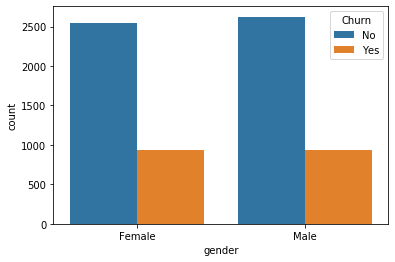

In [23]:
#lets go deeper and look at the gender whichchurned mainly
sns.countplot(x='gender', hue='Churn',data = data)

well we cannot really say that this tells us much, hence we can try something else

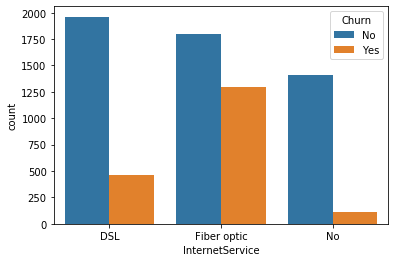

In [25]:
sns.countplot(x="InternetService",hue= "Churn",data=data)

Wow this is really interesting right? now we can see that the most of the customers who churned used fibre optic InternetService and the customerst who remained mostly were DSL, .
So we can already see the problem here and basing on this I can advice the service provider to mostly concentrate on providing DSL compared to fibre optic

Next, I want to take a look visually at the tenure and monthly charges columns to see if there is any discrimination for customer churn

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001AB15136358>,
      dtype=object)

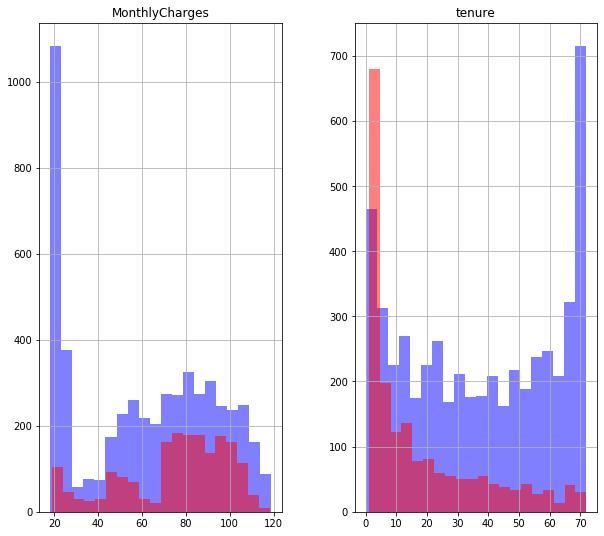

In [26]:
#lets visualise tenure verses the monthly charges
numerical_features = ['tenure', 'MonthlyCharges']
fig , ax = plt.subplots(1,2,figsize=(10,9))
data[data.Churn == "No"] [numerical_features].hist(bins=20,color="blue",alpha=0.5,ax=ax)
data[data.Churn == "Yes"] [numerical_features].hist(bins=20,color="Red",alpha=0.5,ax=ax)

From the two charts above, I can clearly see that there is some discrimination in the data. The monthly charges chart (on the left) shows that most of the loyal customers that stayed with the company had a monthly charge between $20 and $30. Most of the customers that churned had a monthly charge of $70 to $100. Maybe the company should lower the monthly charges to retain customers.
The tenure chart (on the right) shows some discrimination as well. From the chart, I can see that most of the customers that churned had between 1 and 9 months with the company, while most of the retained customers had a tenure between 24 and 72 months which is 2 to 6 years. So, it may be in the companies best interest to try everything they can to keep their customers for at least 2 years.

In [27]:
#lets now clean the data shall we
#getting rid of all the coluns not necessary
data = data.drop("customerID",axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [28]:
#machine learning algorithms cannot be able to work with strings so in one way or another we will have to convert our categorical columns to numericals
from sklearn.preprocessing import LabelEncoder

for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])
#check if it successfully changed
data.dtypes


gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [29]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [31]:
data.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [32]:
y=data["Churn"]

In [33]:
X = data.drop("Churn",axis=1)

In [34]:
#now lets standardise our data
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [96]:
#now that we have standardised our data we now need to split our data into train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X,y,random_state=42)

In [58]:
# from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier(max_depth=10)
# tree.fit(X_train,y_train)

In [59]:
# tree.score(X_train,y_train)

In [60]:
# tree.score(X_test,y_test)

In [82]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=9)
# knn.fit(X_train,y_train)

In [83]:
# knn.score(X_train,y_train)

In [84]:
# knn.score(X_test,y_test)

In [97]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [98]:
#evaluating the model
y_pred = model.predict(X_test)

In [99]:
print(y_pred)

[1 0 0 ... 0 1 0]


In [100]:
#Check precision, recall, f1-score
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1282
           1       0.69      0.55      0.61       479

    accuracy                           0.81      1761
   macro avg       0.76      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



From the report, I can see that the recall of the model is about 91% meaning the model correctly identified about 91% of the customers that were retained and missed about 9%.
The precision of the model was about 84% and the f1-score was about 86%. The accuracy of the model was about 81% which is better than the 73.46% that I could’ve done just by guessing a customer would always stay with the company.
The company may want to lower it’s monthly charges at least for new customers for the first 2 years and stop providing fiber optics internet service, this may be a good strategy to help retain their customers and reduce customer Churn.
Maybe with some more analysis on the data and tweaking of the program, I can improve this models performance and accuracy score.
If you are interested in reading more on machine learning to immediately get started with problems and examples then I strongly recommend you check out Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. It is a great book for helping beginners learn how to write machine learning programs, and understanding machine learning concepts.